<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Udemy%20TensorFlow%20Developer%20Certificate%20Bootcamp/Section%201%20Neural%20Networks%20Regression/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizing the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.

## How you can use this notebook

You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

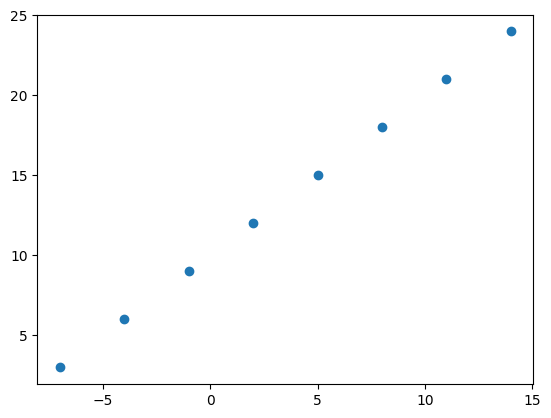

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Before we do any modelling, can you calculate the pattern between `X` and `y`?

For example, say I asked you, based on this data what the `y` value would be if `X` was 17.0?

Or how about if `X` was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
# Create features (using tensors)
X = tf.cast(tf.constant(X), dtype=tf.float32)

# Create labels (using tensors)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

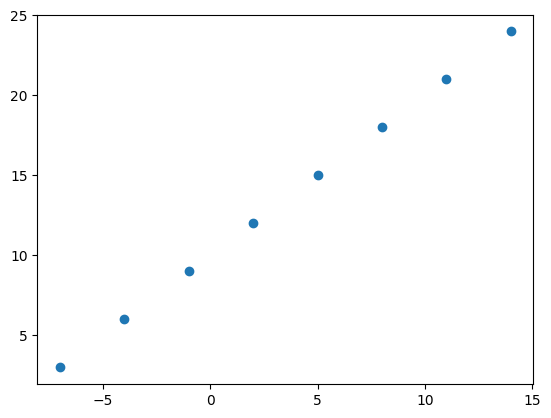

In [ ]:
# Visualize it
plt.scatter(X, y);

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 539ms/step - loss: 17.2365 - mae: 17.2365
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 16.9552 - mae: 16.9552
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 16.6740 - mae: 16.6740
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 16.3927 - mae: 16.3927
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 16.1115 - mae: 16.1115


Boom!

We've just trained a model to figure out the patterns between `X` and `y`.

How do you think it went?

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

What do you think the outcome should be if we passed our model an `X` value of 17.0?

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[-10.027592]], dtype=float32)

In [ ]:
y_pred + 11

array([[0.9724083]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

> 🤔 **Question:** What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 8.4831 - mae: 8.4831
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3506 - mae: 8.3506
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2181 - mae: 8.2181
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0856 - mae: 8.0856
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9531 - mae: 7.9531
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8206 - mae: 7.8206
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6881 - mae: 7.6881
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5556 - mae: 7.5556
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.897932]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 876ms/step - loss: 14.7949 - mae: 14.7949
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2979 - mae: 14.2979
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8063 - mae: 13.8063
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3174 - mae: 13.3174
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8279 - mae: 12.8279
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3351 - mae: 12.3351
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8360 - mae: 11.8360
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3272 - mae: 11.3272
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8055 - mae: 10.8055
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2678 - mae: 10.2678
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[29.792627]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words:

> "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

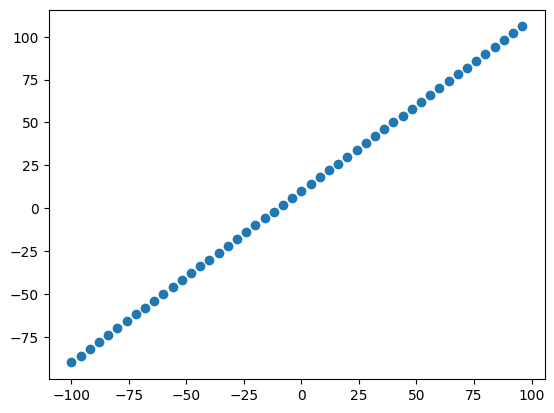

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

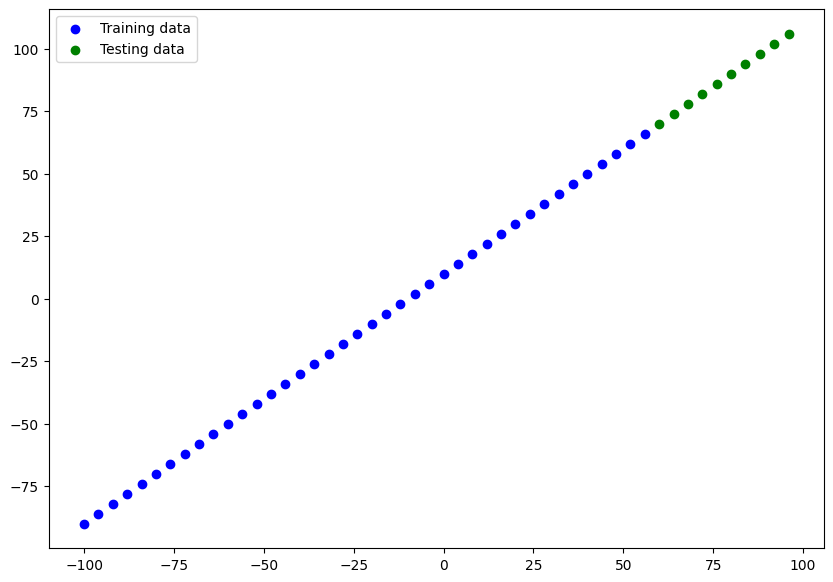

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X what's y?)
# Show a legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [ ]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: ignored

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.


In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)
# verbose affects the display format from 0, 1, 2,...

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

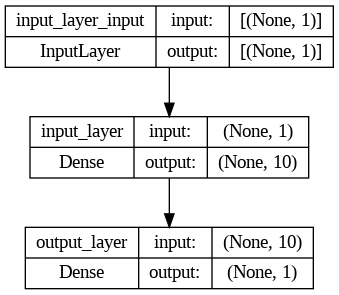

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In our case, the model we used only has an input and an output but visualizing more complicated models can be very helpful for debugging.

### Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 78.26753 ],
       [ 83.369385],
       [ 88.47124 ],
       [ 93.573105],
       [ 98.67496 ],
       [103.77682 ],
       [108.878685],
       [113.98054 ],
       [119.0824  ],
       [124.18426 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

> 🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

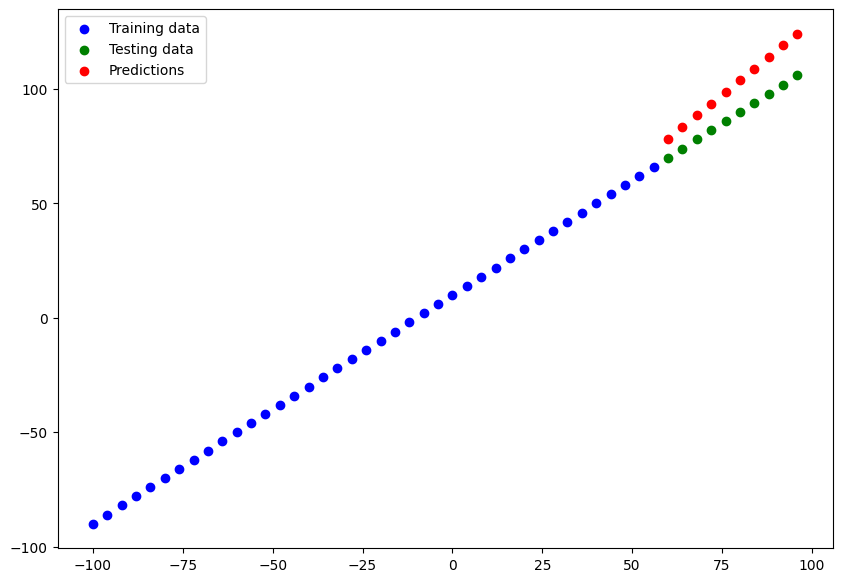

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

### Evaluating our model's predictions with regression evaluation metrics

Alongside visualizations, evaulation metrics are your alternative best option for evaluating your model.


Depending on the problem you're working on, different models have different evaluation metrics.

Since we're working on a regression, two of the main metrics:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions. Meaning "on average, how wrong is each of my model's predictions"
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors). Meaning "square the average errors"

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 131ms/step - loss: 13.2259 - mae: 13.2259


[13.2258882522583, 13.2258882522583]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.292987, 10.526123, 10.      , 10.714621, 12.804975, 16.221455,
       20.878685, 25.980536, 31.082397, 36.184258], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our `y_test` and `y_preds` tensors are different shapes.

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.26753 ],
       [ 83.369385],
       [ 88.47124 ],
       [ 93.573105],
       [ 98.67496 ],
       [103.77682 ],
       [108.878685],
       [113.98054 ],
       [119.0824  ],
       [124.18426 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), it'll remove the the `1` dimension from our `y_preds` tensor, making it the same shape as `y_test`.

> 🔑 **Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, *many* errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.26753 ,  83.369385,  88.47124 ,  93.573105,  98.67496 ,
       103.77682 , 108.878685, 113.98054 , 119.0824  , 124.18426 ],
      dtype=float32)>

Okay, now we know how to make our `y_test` and `y_preds` tensors the same shape, let's use our evaluation metrics.

In [ ]:
from numpy.ma.core import squeeze
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.225891>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=184.94046>

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [ ]:
from keras.losses import mean_absolute_error
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

Build `model_1`

In [ ]:
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66], dtype=int32)>

In [ ]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 20ms/step - loss: 28.9658 - mae: 28.9658
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1623 - mae: 9.1623
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9787 - mae: 7.9787
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9769 - mae: 7.9769
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1755 - mae: 10.1755
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4361 - mae: 9.4361
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5743 - mae: 8.5743
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0377 - mae: 9.0377
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7748 - mae: 18.7748
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1220 - mae: 10.1220
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

1/1 [==============================] - 0s 95ms/step


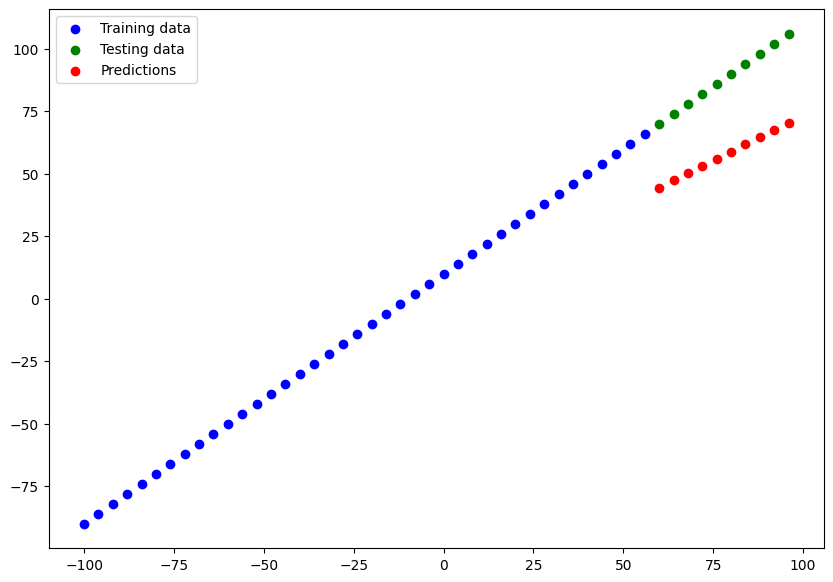

In [ ]:
# Make and plot predictions for modek_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.538584>,
 <tf.Tensor: shape=(), dtype=float32, numpy=942.9668>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs. This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 24.2904 - mse: 1117.9459
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 23.1686 - mse: 750.7102
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 28.2764 - mse: 1207.8270
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 16.3689 - mse: 375.4658
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1227 - mse: 523.9080
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9840 - mse: 233.5620
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2131 - mse: 190.6452
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9601 - mse: 137.7179
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.5189 - mse: 2299.7056
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 26.0273 - mse: 952.5884
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 60ms/step


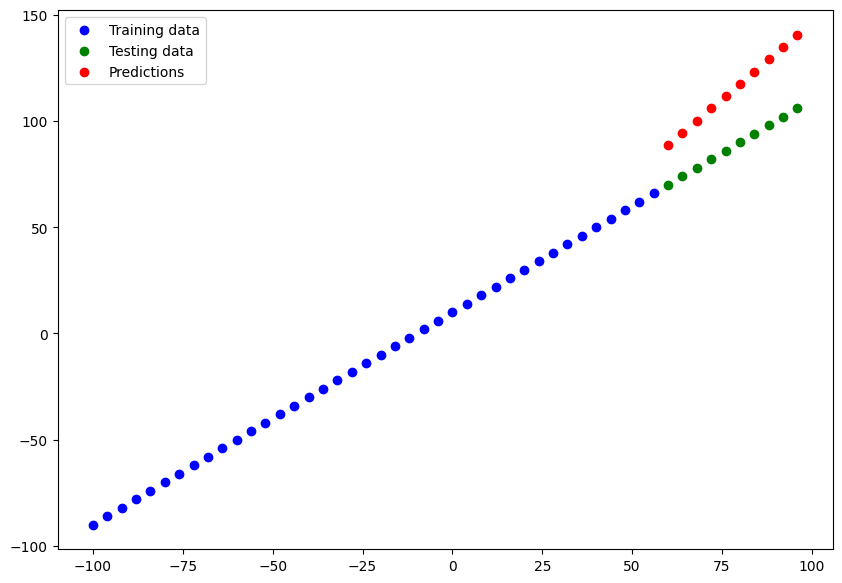

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

Woah, that's looking better already! And all it took was an extra layer.

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.495428>,
 <tf.Tensor: shape=(), dtype=float32, numpy=728.0051>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 15ms/step - loss: 42.6771 - mae: 42.6771
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 29.1524 - mae: 29.1524
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 34.3251 - mae: 34.3251
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.1301 - mae: 27.1301
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.8209 - mae: 14.8209
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8000 - mae: 11.8000
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1448 - mae: 11.1448
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0949 - mae: 11.0949
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.4373 - mae: 40.4373
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8359 - mae: 27.8359
Epoch 11/500
2/2 [==============================] - 0s 10m

1/1 [==============================] - 0s 83ms/step


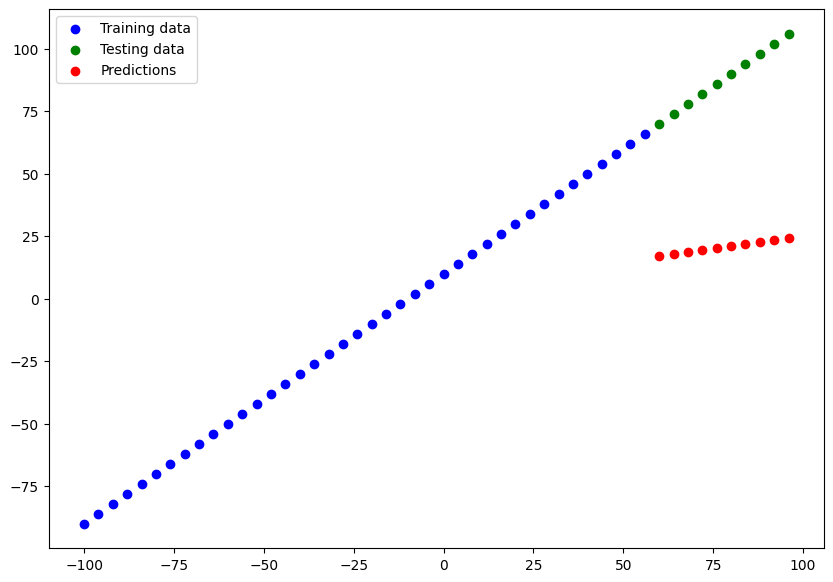

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.252>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4605.591>)

Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
# Let;s compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.538584,942.966797
1,model_2,26.495428,728.005127
2,model_3,67.251999,4605.590820


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


From our experiments, it looks like `model_2` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

And when doing so, it can be tedious if you're running lots of experiments.

> 📖**Resource:** As you build more models, you'll want to look into using:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving our models

Saving our trained models allows us to use them outside of Google Collab (or wherever they were trained) such as in a web application or a mobile app.

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [ ]:
# Load in SavedNodel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Now let's test it out.

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 258ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

Loading in from th HDF5 is much the same.

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                20        
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 235ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Collab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code(see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# # Download a file from Google Collab
# from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file fron Google Collab to Google Drive (requires mounting Google Drive)
# !cp ###FILE PATH OF FILE YOU WANT TO COPY### ###FILE PATH OF WHERE YOU WISH TO DUMP THE COPY###

In [ ]:
# !ls ###FILE PATH###

## A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance datset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View Y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available from Scikit-Learn.

In [ ]:
import random
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

Now we can build and fit a model (we'll make it the same as `model_2`).

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compule the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 8771.4131 - mae: 8771.4131
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7875.5132 - mae: 7875.5132
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7582.8657 - mae: 7582.8657
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7692.2700 - mae: 7692.2700
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7716.4326 - mae: 7716.4326
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7657.8413 - mae: 7657.8413
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7549.5068 - mae: 7549.5068
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7701.5942 - mae: 7701.5942
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7582.1533 - mae: 7582.1533
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7780.3584 - mae: 7780.3584

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7078.2168 - mae: 7078.2168


[7078.216796875, 7078.216796875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer but train for longer (200 epochs)
3. (insert your own experiment here)

Everything else will stay the same.

In [ ]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13267.0459 - mae: 13267.0459
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13072.5283 - mae: 13072.5283
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12671.5703 - mae: 12671.5703
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11906.4854 - mae: 11906.4854
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10685.1924 - mae: 10685.1924
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9223.0977 - mae: 9223.0977
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7986.4795 - mae: 7986.4795
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.4595 - mae: 7493.4595
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7424.6108 - mae: 7424.6108
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7405.3652 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4850.9810 - mae: 4850.9810


[4850.98095703125, 4850.98095703125]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

> 🔑 **Note:** For many problems, the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) is a great starting choice. See Andrei Karpathy's "Adam is safe" point from [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/) for more.

Let's check out the loss curves of our model, we should see a downward trend.

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7078.2168 - mae: 7078.2168


[7078.216796875, 7078.216796875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13308.4492 - mae: 13308.4492
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13163.0449 - mae: 13163.0449
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12846.5420 - mae: 12846.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12205.4287 - mae: 12205.4287
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11097.5938 - mae: 11097.5938
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9633.0635 - mae: 9633.0635
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8256.3135 - mae: 8256.3135
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7550.7661 - mae: 7550.7661
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7427.2852 - mae: 7427.2852
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7405.5288 - mae:

In [ ]:
# Evaluate our 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3490.0627 - mae: 3490.0627


[3490.062744140625, 3490.062744140625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7078.2168 - mae: 7078.2168


[7078.216796875, 7078.216796875]

Text(0.5, 0, 'epochs')

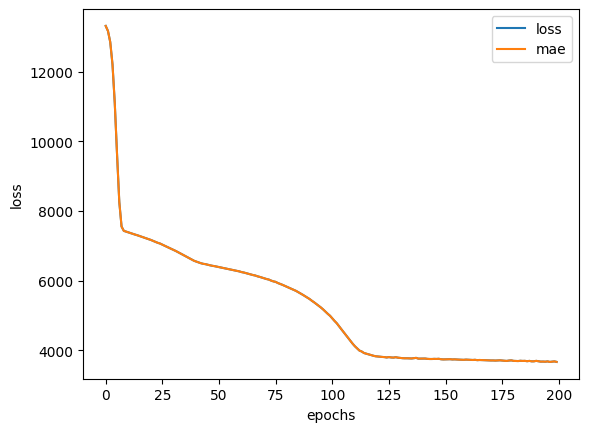

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for?

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit our model on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13344.1562 - mae: 13344.1562
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.3213 - mae: 13336.3213
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13317.0107 - mae: 13317.0107
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13275.5820 - mae: 13275.5820
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13200.5195 - mae: 13200.5195
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13080.4160 - mae: 13080.4160
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12904.6465 - mae: 12904.6465
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12663.0586 - mae: 12663.0586
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12345.4473 - mae: 12345.4473
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11946.82

Let's evaluate the model on normalized test set.

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3436.3088 - mae: 3436.3088


[3436.308837890625, 3436.308837890625]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4850.9810 - mae: 4850.9810

In [ ]:
insurance_model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               1200      
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


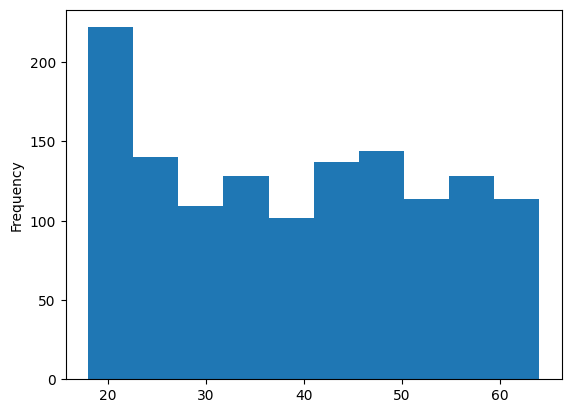

In [ ]:
X["age"].plot(kind="hist");

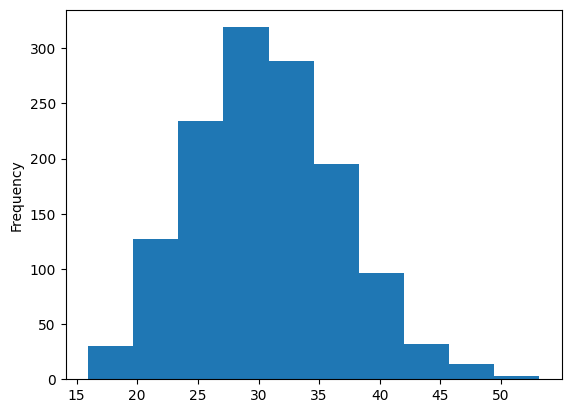

In [ ]:
X["bmi"].plot(kind="hist");

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`insurance_model_2` may have eventually achieved the same results as `insurance_model_3` if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.